In [ ]:
# linear algebra
import numpy as np

# data processing
import pandas as pd

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/adult.csv")
dataset.shape

(32561, 15)

In [ ]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# **Data Preprocessing**

In [ ]:
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1})


In [ ]:
dataset['occupation'] = dataset['occupation'].fillna('Prof-specialty')

In [ ]:
dataset['workclass'].describe()


,workclass
count,32561
unique,9
top,Private
freq,22696


In [ ]:
dataset['workclass'] = dataset['workclass'].fillna('Private')

In [ ]:
dataset['native.country'].describe()

,native.country
count,32561
unique,42
top,United-States
freq,29170


In [ ]:
dataset['native.country'] = dataset['native.country'].fillna('United-States')

In [ ]:

dataset.describe(include=["O"])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27816,21790,29170


In [ ]:
dataset.drop(['fnlwgt'], axis = 1, inplace = True)

In [ ]:
Dataset = dataset.copy()

In [ ]:
Dataset = Dataset.replace('?',np.nan )

In [ ]:
X = dataset.drop(['income'], axis=1)
Y = dataset['income']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn import preprocessing

categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship','race', 'sex','native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

# **Applying Decision Tree Classification**

In [ ]:
#Applying the Decision Tree algorithm

decision_tree = DecisionTreeClassifier(criterion = "gini", splitter="best", max_depth=20)
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree)

94.45


In [ ]:
decision_tree = DecisionTreeClassifier(criterion = "gini", splitter="best", max_depth=40)
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree)

98.14


In [ ]:
X = dataset.drop(['income'], axis=1)
Y = dataset['income']

In [ ]:
x = X
y = Y

categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship','race', 'sex','native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        x[feature] = le.fit_transform(x[feature])

x

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,0,11,9,6,0,1,4,0,0,4356,40,39
1,82,4,11,9,6,4,1,4,0,0,4356,18,39
2,66,0,15,10,6,0,4,2,0,0,4356,40,39
3,54,4,5,4,0,7,4,4,0,0,3900,40,39
4,41,4,15,10,5,10,3,4,0,0,3900,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,15,10,4,11,1,4,1,0,0,40,39
32557,27,4,7,12,2,13,5,4,0,0,0,38,39
32558,40,4,11,9,2,7,0,4,1,0,0,40,39
32559,58,4,11,9,6,1,4,4,0,0,0,40,39


In [ ]:
xdf = pd.DataFrame(scaler.fit_transform(x), columns = X.columns)
xdf

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,3.769612,-2.65732,0.181332,-0.420060,2.249480,-1.554283,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-0.035429,0.291569
1,3.183112,0.09005,0.181332,-0.420060,2.249480,-0.608387,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-1.817204,0.291569
2,2.010110,-2.65732,1.214869,-0.031360,2.249480,-1.554283,1.589322,-1.962621,-1.422331,-0.14592,10.593507,-0.035429,0.291569
3,1.130359,0.09005,-1.368974,-2.363558,-1.734058,0.101036,1.589322,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.291569
4,0.177296,0.09005,1.214869,-0.031360,1.585557,0.810458,0.966947,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.291569
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.215643,0.09005,1.214869,-0.031360,0.921634,1.046932,-0.277805,0.393668,0.703071,-0.14592,-0.216660,-0.035429,0.291569
32557,-0.849080,0.09005,-0.852205,0.746039,-0.406212,1.519881,2.211698,0.393668,-1.422331,-0.14592,-0.216660,-0.197409,0.291569
32558,0.103983,0.09005,0.181332,-0.420060,-0.406212,0.101036,-0.900181,0.393668,0.703071,-0.14592,-0.216660,-0.035429,0.291569
32559,1.423610,0.09005,0.181332,-0.420060,2.249480,-1.317809,1.589322,0.393668,-1.422331,-0.14592,-0.216660,-0.035429,0.291569


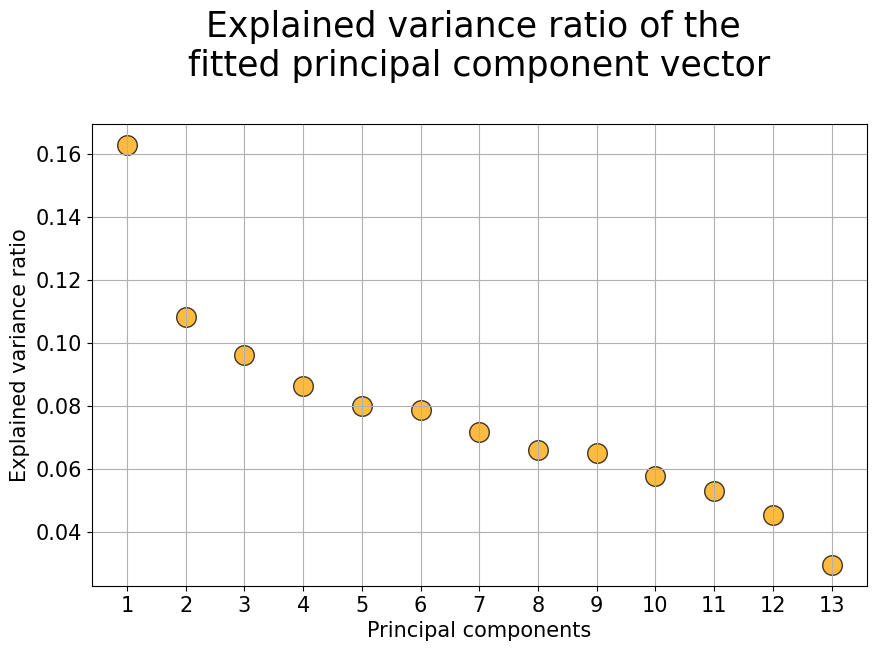

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
dfx_pca = pca.fit(xdf)

plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()